# Model Benchmarking
---

## `SlowLogisticRegression` Class

The snippet below illustrates the typical usage of the `SlowLogisticRegression` class provided by this implementation using the [breast cancer dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).

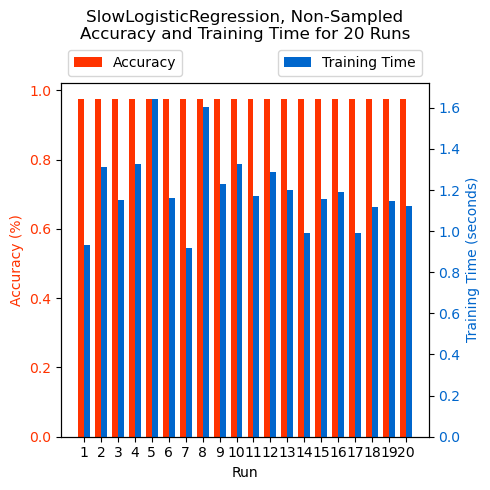

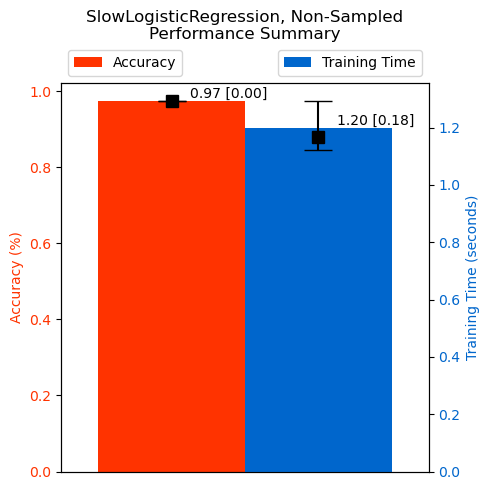

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from regression.SlowLogisticRegression import SlowLogisticRegression
from utilities.Stopwatch import Stopwatch
import matplotlib.pyplot as plt
import numpy as np

SERIES_BLUE = '#0066cc'
SERIES_ORANGE = '#ff3300'

def plot_results(accuracies, training_times, type, time_scale):
    # First chart: Bar plot for accuracies and training times.
    fig1, ax1 = plt.subplots(figsize=(5, 5))

    x = np.arange(1, len(accuracies) + 1)
    width = 0.35

    bars1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy', color=SERIES_ORANGE)
    ax1.set_ylabel('Accuracy (%)', color=SERIES_ORANGE)
    ax1.tick_params(axis='y', labelcolor=SERIES_ORANGE)

    ax1_twin = ax1.twinx()
    bars2 = ax1_twin.bar(x + width/2, training_times, width, label='Training Time', color=SERIES_BLUE)
    ax1_twin.set_ylabel(f"Training Time ({time_scale})", color=SERIES_BLUE)
    ax1_twin.tick_params(axis='y', labelcolor=SERIES_BLUE)

    ax1.set_xlabel('Run')
    ax1.set_title(f"{type}\nAccuracy and Training Time for {len(accuracies)} Runs\n\n")
    ax1.set_xticks(x)

    ax1.legend(bbox_to_anchor=(0, 1), loc='lower left')
    ax1_twin.legend(bbox_to_anchor=(1, 1), loc='lower right')

    plt.tight_layout()
    
    plt.show()

    # Second chart: Summary statistics.
    fig2, ax2 = plt.subplots(figsize=(5, 5))

    mean1, std1 = np.mean(accuracies), np.std(accuracies)
    mean2, std2 = np.mean(training_times), np.std(training_times)
    median1, median2 = np.median(accuracies), np.median(training_times)
    q1_1, q3_1 = np.percentile(accuracies, [25, 75])
    q1_2, q3_2 = np.percentile(training_times, [25, 75])

    ax2.bar(-0.2, mean1, width=0.4, color=SERIES_ORANGE, label='Accuracy')
    ax2.errorbar(-0.2, mean1, yerr=[[max(0, mean1-q1_1)], [max(0, q3_1-mean1)]], capsize=10, color='black')
    ax2.plot(-0.2, median1, marker='s', color='black', markersize=8)

    ax2_twin = ax2.twinx()
    ax2_twin.bar(0.2, mean2, width=0.4, color=SERIES_BLUE, label='Training Time')
    ax2_twin.errorbar(0.2, mean2, yerr=[[max(0, mean2-q1_2)], [max(0, q3_2-mean2)]], capsize=10, color='black')
    ax2_twin.plot(0.2, median2, marker='s', color='black', markersize=8)

    ax2.set_xlim(-0.5, 0.5)
    ax2.set_ylabel('Accuracy (%)', color=SERIES_ORANGE)
    ax2_twin.set_ylabel(f"Training Time ({time_scale})", color=SERIES_BLUE)
    ax2.tick_params(axis='y', labelcolor=SERIES_ORANGE)
    ax2_twin.tick_params(axis='y', labelcolor=SERIES_BLUE)
    ax2.set_title(f"{type}\nPerformance Summary\n\n")
    ax2.set_xticks([])

    ax2.text(-0.15, mean1, f'{mean1:.2f} [{std1:.2f}]', ha='left', va='bottom', color='black')
    ax2_twin.text(0.25, mean2, f'{mean2:.2f} [{std2:.2f}]', ha='left', va='bottom', color='black')

    ax2.legend(bbox_to_anchor=(0, 1), loc='lower left')
    ax2_twin.legend(bbox_to_anchor=(1, 1), loc='lower right')

    plt.tight_layout()
    
    plt.show()

def run_experiment1(X, y, n_runs):
    accuracies = []
    training_times = []

    for _ in range(n_runs):
        # Splitting the data into training and test sets.
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Scaling the features.
        scaler = MinMaxScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Measuring time performance.
        training_stopwatch = Stopwatch()
        training_stopwatch.start()

        # Initializing and training the model.
        logistic_regression_model = SlowLogisticRegression(learning_rate=0.1, epochs=5000)
        logistic_regression_model.fit(X_train, y_train, False)

        # Measuring time performance.
        training_time = training_stopwatch.stop()

        # Making predictions on the test set.
        predictions = logistic_regression_model.predict(X_test)

        # Evaluating model.
        accuracy = accuracy_score(y_test, predictions)

        accuracies.append(accuracy)
        training_times.append(training_time)

    return accuracies, training_times


# Loading the breast cancer dataset.
data = load_breast_cancer()
X, y = data.data, data.target

# Running the experiment.
accuracies, training_times = run_experiment1(X, y, 20)

# Plotting the results.
plot_results(accuracies, training_times, 'SlowLogisticRegression, Non-Sampled', 'seconds')

## SciKit-Learn's `LogisticRegression` Class

The snippet below evaluates SciKit-Learn's `LogisticRegression` class. 

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from utilities.Stopwatch import Stopwatch

data = load_breast_cancer()
X = data.data
y = data.target

training_stopwatch = Stopwatch()
training_stopwatch.start()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

training_time = training_stopwatch.stop()
prediction_stopwatch = Stopwatch()
prediction_stopwatch.start()

predictions = model.predict(X_test)

prediction_time = prediction_stopwatch.stop()
accuracy = accuracy_score(y_test, predictions)

print(f"SciKit-Learn's Accuracy: {accuracy * 100:.2f}%")
print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

SciKit-Learn's Accuracy: 97.37%
Training Time: 0.00778 seconds
Prediction Time: 0.00082 seconds


# `SlowLogisticRegression` Class with `BasicOptimizedSampler`

The snippet below leverages a simplified version of the paper's proposed sampling algorithm. 

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from regression.SlowLogisticRegression import SlowLogisticRegression
from optimized_sampling.BasicLeverageScoresSampler import BasicLeverageScoresSampler
from utilities.Stopwatch import Stopwatch

# Loading the breast cancer dataset.
data = load_breast_cancer()
X, y = data.data, data.target

# Measuring time performance.
training_stopwatch = Stopwatch()
training_stopwatch.start()

# Sampling the data using BasicOptimizedSampler.
sampler = BasicLeverageScoresSampler()
X_sampled, y_sampled = sampler.sample(X, y, 0.2) # Sampling 20% of the data.

# Splitting the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Scaling the features.
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Initializing and training the model.
logistic_regression_model = SlowLogisticRegression(learning_rate=0.1, epochs=5000)
logistic_regression_model.fit(X_train, y_train, False)

training_time = training_stopwatch.stop()
prediction_stopwatch = Stopwatch()
prediction_stopwatch.start()

# Making predictions on the test set.
predictions = logistic_regression_model.predict(X_test)

# Evaluating model.
prediction_time = prediction_stopwatch.stop()
accuracy = accuracy_score(y_test, predictions)

print(f"\nSlow Logistic Regression with Sampled Data Accuracy: {accuracy * 100:.2f}%")
print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")


Slow Logistic Regression with Sampled Data Accuracy: 95.65%
Training Time: 0.20064 seconds
Prediction Time: 0.00008 seconds


# SciKit-Learn's `LogisticRegression` Class with `BasicOptimizedSampler`

The snippet below evaluates SciKit-Learn's `LogisticRegression` class with training data sampled with `BasicOptimizedSampler`.

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from optimized_sampling.BasicLeverageScoresSampler import BasicLeverageScoresSampler
from sklearn.metrics import accuracy_score
from utilities.Stopwatch import Stopwatch

data = load_breast_cancer()
X = data.data
y = data.target

training_stopwatch = Stopwatch()
training_stopwatch.start()

sampler = BasicLeverageScoresSampler()
X_sampled, y_sampled = sampler.sample(X, y, 0.2) # Sampling 20% of the data.

X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)

training_time = training_stopwatch.stop()
prediction_stopwatch = Stopwatch()
prediction_stopwatch.start()

predictions = model.predict(X_test)

prediction_time = prediction_stopwatch.stop()
accuracy = accuracy_score(y_test, predictions)

print(f"SciKit-Learn's accuracy: {accuracy * 100:.2f}%")
print(f"Training Time: {training_time:.5f} seconds")
print(f"Prediction Time: {prediction_time:.5f} seconds")

SciKit-Learn's accuracy: 86.96%
Training Time: 0.00592 seconds
Prediction Time: 0.00034 seconds
